# Jupyter notebook

## Utilisation de jupyter notebook

* Créer un répertoire pour le TD d'aujourd'hui (nommé par exemple TD1 ou 2020_10_06
* Dans ce répertoire, créer un notebook. 
* Si vous n'êtes par famillier avec les notebook, voici quelques astuces : 
    * Utilisation de la touche 'Tab' pour la complétion automatique
    * Utiliser la combinaiser Ctrl + Entrée pour valider une celluler
    * Menu : Cellule -> type de cellule -> markdown pour créer une zone de texte
    
Par exemple, créer au début de votre notebook les blocs suivants (zone de texte et calcul). Il est possible de rentrer des équations en utilisant le format latex : \\$E=mc^2\\$

In [ ]:
------------------------------------------------------

## Relativité

Tout le monde connait la formule $E=mc^2$. Mais que vaut exactement l'énergie de masse d'une pomme ?

In [2]:
masse_d_une_pomme = 0.2
c = 3E8

energie_masse_pomme = masse_d_une_pomme*c**2
print(f"L'énergie de masse d'une pomme est {energie_masse_pomme:.3e} J")

L'énergie de masse d'une pomme est 1.800e+16 J


In [ ]:
------------------------------------------------------

# Analyse des données du CAC 40

Téléchager depuis le site https://www.abcbourse.com/download/valeur/PX1p les données du CAC 40 depuis 2 ans. On laissera le format 'Action bourse'.  Le fichier texte obtenu contient : l'identifiant de la valeur, la date, le cours d'ouverture, le plus haut, le plus bas, le cours de clôture et le volume de titres échangés. Ce contenu est séparé par des `;`.

Remarque : la métode `split` d'une chaine de caractère permet de la séparer en plusieurs sous chaînes. Par exemple : 

```
s = '12;bonjour;3.14'
print(s.split(';'))
```




1. Afficher les 10 premières lignes du fichier

2. Créer une liste contenant le plus haut de la bourse jour par jour. Qu'elle est la valeur la plus haute du CAC 40 au cours des deux dernières années ?

3. Écrire une fonction qui prend le jour, le mois et l'année et renvoie une chaîne de caractère pour la date sous la forme : jj/mm/aa (par exemple 11/02/19)

4. Écrire une fonction qui renvoie le plus bas d'une journée à partir du jour, du mois et de l'année. Cette fontion renverra une exception si le jour n'existe pas. 

5. Plutôt qu'une liste, on va utiliser un dictionnaire dont la clé sera la date. Créer un dictionnaire qui contiendra pour chaque jour un dictionnaire avec pour clé : 'haut', 'bas', 'ouverture', 'fermeture', 'volume'. Par exemple on pourra utiliser :
  ```cac_40['27/03/20']['haut']```

6. Enregistrer ce dictionnaire dans un fichier au format json. Vérifier que vous pouvez l'ouvrir !

7. Regarder la documentation de la fontion ``parse`` du module ``dateutil.parser`` et trouver le moyen de convertir une date sous la forme ``05/10/18`` en un nombre (nombre de jour ou nombre de seconde depuis une date donnée). 

8. Tracer l'évolution au cours du temps de CAC 40.

In [12]:
with open('PX1.txt') as f:
    toutes_les_lignes = f.readlines()
    
for elm in toutes_les_lignes[:10]:
    print(elm)

FR0003500008;24/09/18;5480.64;5488.18;5463.44;5476.17;3312679

FR0003500008;25/09/18;5468.91;5497.15;5468.78;5479.10;3353051

FR0003500008;26/09/18;5482.99;5512.75;5471.57;5512.73;3638713

FR0003500008;27/09/18;5500.25;5546.80;5485.83;5540.41;3331707

FR0003500008;28/09/18;5514.55;5527.24;5458.21;5493.49;4598176

FR0003500008;01/10/18;5494.93;5519.94;5491.17;5506.82;3162953

FR0003500008;02/10/18;5473.79;5480.24;5440.78;5467.89;3527714

FR0003500008;03/10/18;5485.02;5509.08;5468.47;5491.40;2889112

FR0003500008;04/10/18;5471.88;5477.92;5404.84;5410.85;4435990

FR0003500008;05/10/18;5407.58;5412.31;5354.79;5359.36;3770764



In [4]:
plus_haut = []
for elm in toutes_les_lignes:
    plus_haut.append(float(elm.split(';')[3]))
max(plus_haut) # Remarque : ne pas coder soi même la fonction max!

6111.41

In [5]:
def format_date(jour, mois, annee):
    """Formate la date sous la forme : jj/mm/aa
    """
    return f"{jour:02d}/{mois:02d}/{annee%100:02d}"

assert format_date(11, 2, 2018)=='11/02/18'


In [6]:
def plus_bas(jour, mois, annee):
    date_demandee = format_date(jour, mois, annee)
    for elm in toutes_les_lignes:
        _, date, ouverture, haut, bas, fermeture, volume = elm.split(';')
        if date==date_demandee:
            return float(bas)
    raise Exception(f"La date {date_demandee} n'a pas pu être trouvée")

print(plus_bas(5, 10, 18))


print(plus_bas(5, 10, 10))

5354.79


Exception: La date 05/10/10 n'a pas pu être trouvée

In [7]:
cac_40 = {}
for elm in toutes_les_lignes:
    _, date, ouverture, haut, bas, fermeture, volume = elm.split(';')
    line = {
        'ouverture':float(ouverture),
        'haut' : float(haut),
        'bas' : float(bas),
        'fermeture' : float(fermeture),
        'volume' : int(volume)
    }
    cac_40[date] = line
    
cac_40['05/10/18']['fermeture']

5359.36

In [8]:
import json

with open('cac_40.json', 'w') as f:
    json.dump(cac_40, f, indent=3)

In [9]:
with open('cac_40.json') as f:
    tmp = json.load(f)
    
    
tmp['05/10/18']['fermeture']

5359.36

In [10]:
from dateutil.parser import parse
day = parse('05/10/18', dayfirst=True)


list_of_day = []
list_of_ouverture = []
for key, elm in cac_40.items():
    list_of_day.append(parse(key, dayfirst=True).toordinal())
    list_of_ouverture.append(elm['ouverture'])

    

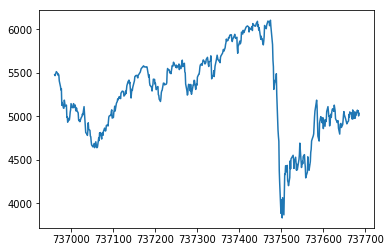

In [11]:
%matplotlib inline
from matplotlib.pyplot import *

plot(list_of_day, list_of_ouverture)
